In [2]:
from angle import Angle, c_sin
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')

In [3]:
null_angle = Angle(192, 36, 10)

## m = 1

In [4]:
angles = [Angle(180, 2, 30), Angle(178, 23, 51), Angle(176, 47, 43), Angle(175, 53, 5), Angle(175, 48, 29), Angle(174, 29, 21)]
angles = np.array(list(map(lambda a: null_angle - a, angles)))
colors = ['blue', 'l-blue', 'green', 'yellow-1', 'yellow-2', 'red']
sins = [c_sin(a) for a in angles]
wave = [435.8, 491.6, 546.1, 577, 579.1, 623.4]

In [5]:
print(*angles)

12*33'40'' 14*12'19'' 15*48'27'' 16*43'5'' 16*47'41'' 18*6'49''


In [6]:
print(*[f'${a.tex()}$' for a in angles])

$12 ^{\circ}33'40''$ $14 ^{\circ}12'19''$ $15 ^{\circ}48'27''$ $16 ^{\circ}43'5''$ $16 ^{\circ}47'41''$ $18 ^{\circ}6'49''$


In [7]:
print(*[f'{s:.3f}' for s in sins])

0.219 0.246 0.274 0.288 0.291 0.313


In [8]:
p, er = np.polyfit(sins, wave, deg=1, cov=True)
p, er

(array([2005.30241029,   -2.73567021]),
 array([[ 459.33934957, -124.81662801],
        [-124.81662801,   34.35538335]]))

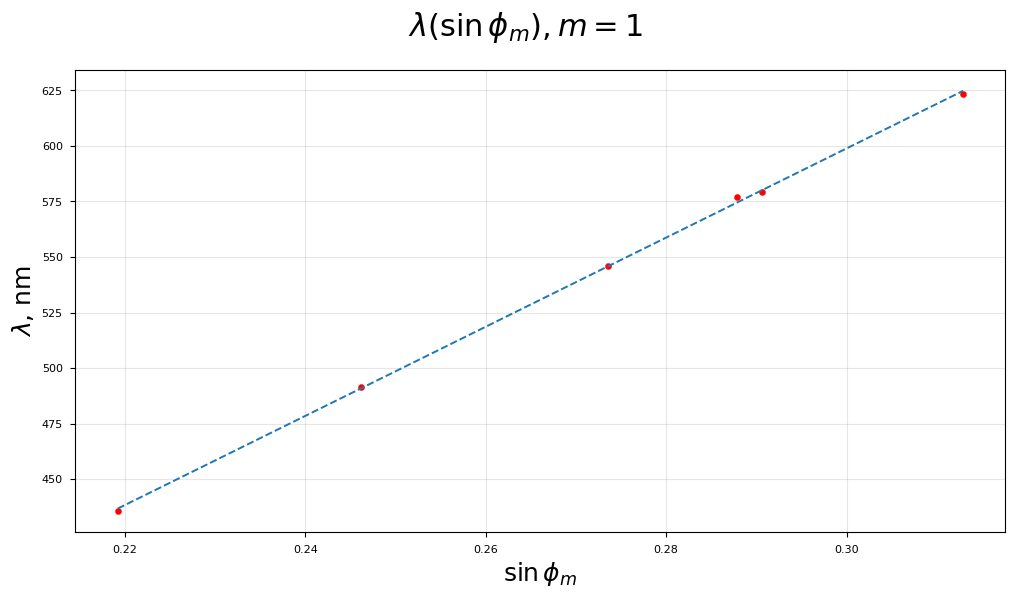

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('$\lambda (\sin \phi_m), m = 1$', fontsize=22)

x = np.linspace(min(sins), max(sins), 100)
ax.plot(x, p[0] * x + p[1], linestyle='dashed')
ax.scatter(sins, wave, s=20, c='red')

ax.set_xlabel('$\sin \phi_m$', fontsize=18)
ax.set_ylabel('$\lambda$, nm', fontsize=18)
ax.grid(True, alpha=.3)
plt.show()

fig.savefig('m1.pdf')

## m = 2

In [10]:
angles_2 = [Angle(166, 51, 33), Angle(163, 16, 33), Angle(159, 40, 4), Angle(157, 33, 34), Angle(157, 24, 33)]
angles_2 = np.array([null_angle - a for a in angles_2])
sins_2 = np.array([c_sin(a) for a in angles_2])
wave_2 = [435.8, 491.6, 546.1, 577, 579.1]
colors_2 = ['violent', 'l-blue', 'green', 'yellow-1', 'yellow-2']

In [11]:
print(*angles_2)

25*44'37'' 29*19'37'' 32*56'6'' 35*2'36'' 35*11'37''


In [12]:
print(*[f'${a.tex()}$' for a in angles_2])

$25 ^{\circ}44'37''$ $29 ^{\circ}19'37''$ $32 ^{\circ}56'6''$ $35 ^{\circ}2'36''$ $35 ^{\circ}11'37''$


In [13]:
print(*[f'{s:.3f}' for s in sins_2])

0.436 0.491 0.544 0.575 0.578


In [14]:
p_2, er_2 = np.polyfit(sins_2, wave_2, deg=1, cov=True)
p_2, er_2

(array([1012.27227105,   -5.32973783]),
 array([[ 21.54979633, -11.30953003],
        [-11.30953003,   5.99903765]]))

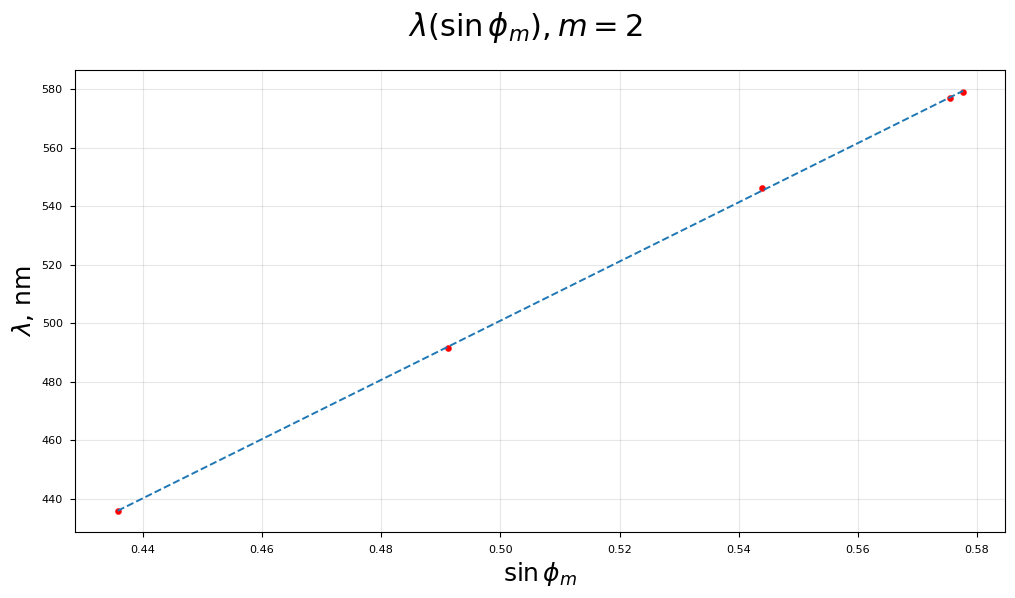

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('$\lambda (\sin \phi_m), m = 2$', fontsize=22)

x = np.linspace(min(sins_2), max(sins_2), 100)
ax.plot(x, p_2[0] * x + p_2[1], linestyle='dashed')
ax.scatter(sins_2, wave_2, s=20, c='red')

ax.set_xlabel('$\sin \phi_m$', fontsize=18)
ax.set_ylabel('$\lambda$, nm', fontsize=18)
ax.grid(True, alpha=.3)
plt.show()

fig.savefig('m2.pdf')

## United graph

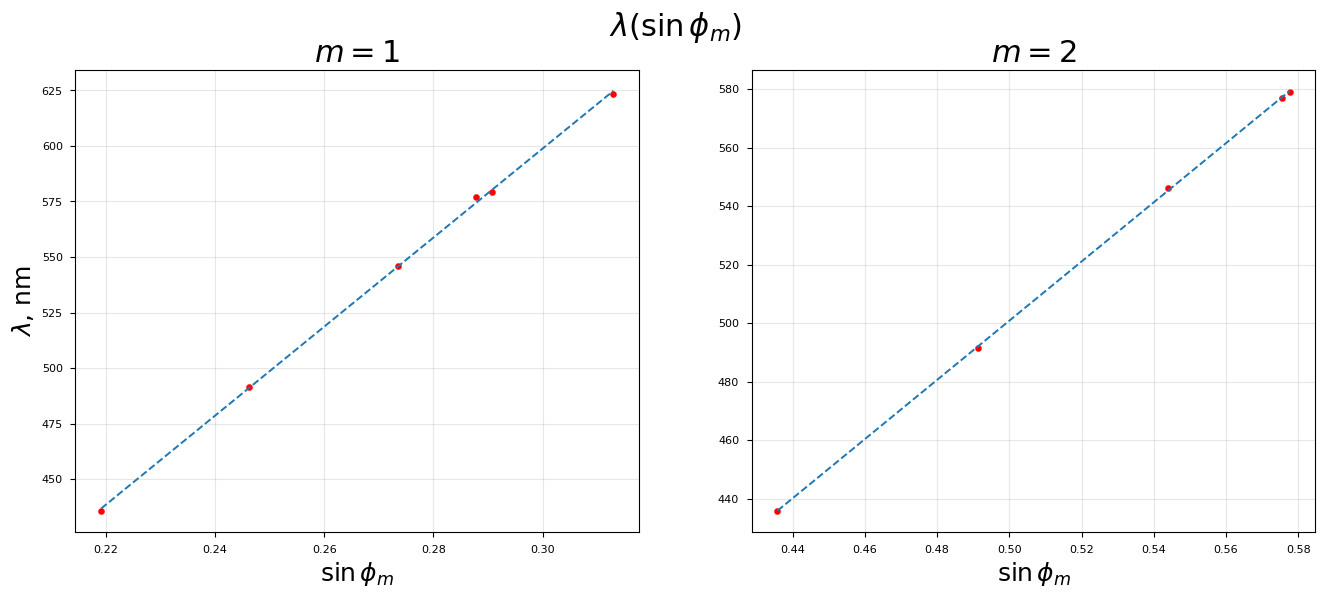

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('$\lambda (\sin \phi_m)$', fontsize=22)
ax[0].set_title('$m = 1$', fontsize=22)
ax[1].set_title('$m = 2$', fontsize=22)

x = np.linspace(min(sins), max(sins), 100)
ax[0].plot(x, p[0] * x + p[1], linestyle='dashed')
ax[0].scatter(sins, wave, s=20, c='red')

x = np.linspace(min(sins_2), max(sins_2), 100)
ax[1].plot(x, p_2[0] * x + p_2[1], linestyle='dashed')
ax[1].scatter(sins_2, wave_2, s=20, c='red')


ax[0].set_xlabel('$\sin \phi_m$', fontsize=18)
ax[0].set_ylabel('$\lambda$, nm', fontsize=18)
ax[0].grid(True, alpha=.3)
ax[1].set_xlabel('$\sin \phi_m$', fontsize=18)
#ax[1].set_ylabel('$\lambda$, nm', fontsize=18)
ax[1].grid(True, alpha=.3)
plt.show()

fig.savefig('gr.pdf')

## Some stats

### $d \phi$

In [17]:
dphi = (4 / 60 + 36 / 360) * np.pi / 180
dphi2 = (9 / 60 + 1 / 360) * np.pi / 180
dphi, dphi2

(0.0029088820866572163, 0.0026664752461024476)

### $D$, exp

In [18]:
D = dphi / (21e-10)
D2 = dphi / (21e-10)
print(D / 1e10, D2 / 1e10)

0.00013851819460272458 0.00013851819460272458


### $D$, teor

In [19]:
d = 2e-6
Dteor = 1 / np.sqrt(d ** 2 - (21e-10) ** 2)
Dtoer2 = 2 / np.sqrt(d ** 2 - (2 * 21e-10) ** 2)
print(Dteor / 1e10, Dtoer2 / 1e10)

5.000021154062068e-05 0.0001000003555055651


### $\delta \lambda$

In [20]:
deltL = dphi / D * 1e10
deltL_2 = dphi2 / D2 * 1e10
deltL, deltL_2

(21.000000000000004, 19.249999999999993)

### R

In [24]:
577 / 2.1, 577 / 1.92

(274.76190476190476, 300.52083333333337)

In [25]:
275 * 2, 150 * 2

(550, 300)